# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Análise de Dados com Linguagem Python</font>

## <font color='blue'>Projeto 10</font>
## <font color='blue'>Design e Construção de 50 Visualizações</font>
## <font color='blue'>Visualização 12</font>

### Definição do Problema e Fonte de Dados

Leia os manuais em pdf no Capítulo 11 do curso.

Neste mini-projeto o objetivo será compreender a evolução do preço das ações da AstraZeneca.

In [3]:
# Imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pandas_datareader
import sqlite3
import yfinance
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

sqlite3          : 2.6.0
yfinance         : 0.2.28
matplotlib       : 3.4.3
numpy            : 1.24.4
pandas           : 1.3.3
pandas_datareader: 0.10.0



In [5]:
AZN = "AZN" 

In [6]:
AZN = yfinance.download(AZN)

[*********************100%%**********************]  1 of 1 completed


In [7]:
AZN.shape

(7626, 6)

In [8]:
AZN.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-05-12,5.291667,5.291667,5.020833,5.041667,1.767087,414000
1993-05-13,5.000000,5.000000,4.791667,4.854167,1.701369,792600
1993-05-14,4.875000,4.875000,4.791667,4.791667,1.679463,646200
1993-05-17,4.833333,4.895833,4.833333,4.895833,1.715973,68400
1993-05-18,4.895833,4.895833,4.833333,4.854167,1.701369,69000


In [9]:
AZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7626.000000,7626.000000,7626.000000,7626.000000,7626.000000,7.626000e+03
mean,27.484039,27.691308,27.286224,27.495981,19.219643,2.999741e+06
std,14.532453,14.638837,14.421027,14.527207,16.501453,3.384832e+06
min,4.479167,4.500000,4.479167,4.479167,1.569932,2.400000e+03
25%,20.139999,20.375000,19.950001,20.174999,9.046342,9.422500e+05
50%,23.627500,23.799999,23.497500,23.655625,12.853281,2.282050e+06
75%,33.240002,33.490002,33.082500,33.310001,25.569903,3.959550e+06
max,76.500000,76.559998,75.660004,75.809998,75.315445,6.554020e+07


In [10]:
AZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7626 entries, 1993-05-12 to 2023-08-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7626 non-null   float64
 1   High       7626 non-null   float64
 2   Low        7626 non-null   float64
 3   Close      7626 non-null   float64
 4   Adj Close  7626 non-null   float64
 5   Volume     7626 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 417.0 KB


In [11]:
conn = sqlite3.connect("dados/AZN.db")
c = conn.cursor()

In [12]:
# Salvando em um banco de dados 
AZN.to_sql("AZN", conn, if_exists = 'replace')

In [13]:
# Visualiza os dados
c.execute("""SELECT * FROM AZN""")
rows = c.fetchall()
rows


[('1993-05-12 00:00:00',
  5.2916669845581055,
  5.2916669845581055,
  5.0208330154418945,
  5.0416669845581055,
  1.7670866250991821,
  414000),
 ('1993-05-13 00:00:00',
  5.0,
  5.0,
  4.7916669845581055,
  4.8541669845581055,
  1.7013686895370483,
  792600),
 ('1993-05-14 00:00:00',
  4.875,
  4.875,
  4.7916669845581055,
  4.7916669845581055,
  1.6794631481170654,
  646200),
 ('1993-05-17 00:00:00',
  4.8333330154418945,
  4.8958330154418945,
  4.8333330154418945,
  4.8958330154418945,
  1.7159727811813354,
  68400),
 ('1993-05-18 00:00:00',
  4.8958330154418945,
  4.8958330154418945,
  4.8333330154418945,
  4.8541669845581055,
  1.7013686895370483,
  69000),
 ('1993-05-19 00:00:00',
  4.8541669845581055,
  4.875,
  4.8541669845581055,
  4.875,
  1.7086716890335083,
  72000),
 ('1993-05-20 00:00:00',
  4.875,
  4.8958330154418945,
  4.8541669845581055,
  4.875,
  1.7086716890335083,
  118800),
 ('1993-05-21 00:00:00',
  4.875,
  4.875,
  4.875,
  4.875,
  1.7086716890335083,
  1320

In [23]:
# Salva em disco
AZN.to_excel("~/Desktop/DataScienceAcademy/projeto10/AZN.xls")


In [25]:
# Carrega do disco
df = pd.read_excel("~/Desktop/DataScienceAcademy/projeto10/AZN.xls")

In [26]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-05-12,5.291667,5.291667,5.020833,5.041667,1.767087,414000
1,1993-05-13,5.000000,5.000000,4.791667,4.854167,1.701369,792600
2,1993-05-14,4.875000,4.875000,4.791667,4.791667,1.679463,646200
3,1993-05-17,4.833333,4.895833,4.833333,4.895833,1.715973,68400
4,1993-05-18,4.895833,4.895833,4.833333,4.854167,1.701369,69000


In [27]:
df['Date']

0      1993-05-12
1      1993-05-13
2      1993-05-14
3      1993-05-17
4      1993-05-18
          ...    
7621   2023-08-17
7622   2023-08-18
7623   2023-08-21
7624   2023-08-22
7625   2023-08-23
Name: Date, Length: 7626, dtype: datetime64[ns]

In [28]:
df['Close']

0        5.041667
1        4.854167
2        4.791667
3        4.895833
4        4.854167
          ...    
7621    69.120003
7622    68.459999
7623    68.879997
7624    68.769997
7625    69.099998
Name: Close, Length: 7626, dtype: float64

> Dataviz 12 - Gráfico de Linha com a evolução da variável preço ao longo do tempo

FileNotFoundError: [Errno 2] No such file or directory: 'imagens/dataviz12.png'

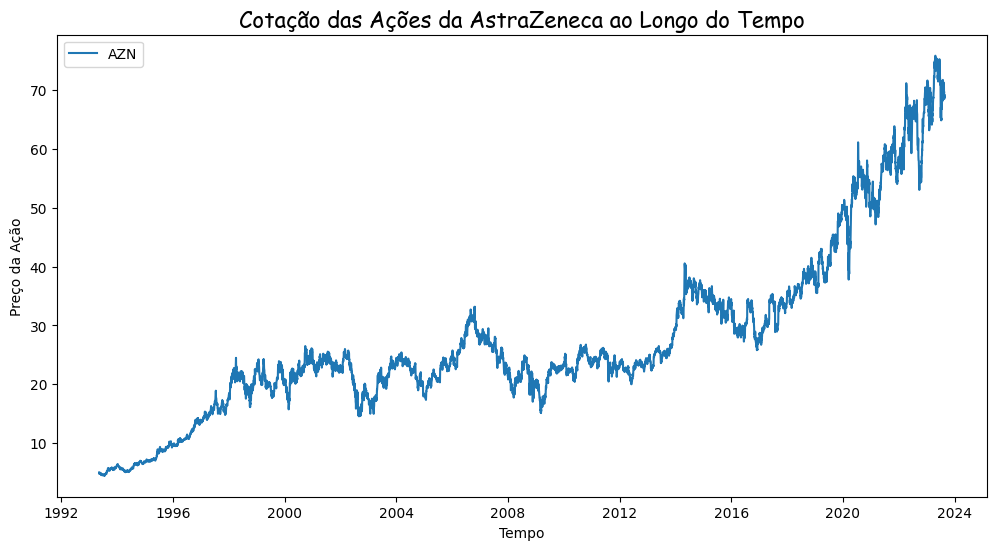

In [29]:
# Dataviz 12

# Dados
x = df['Date']
y = df['Close']

# Tamanho do gráfico (dpi especifica pixels por polegada)
plt.figure(figsize = (12,6), dpi = 100)

# Plot
plt.plot(x, y, label = 'AZN')

# Título
plt.title('Cotação das Ações da AstraZeneca ao Longo do Tempo', 
          fontdict = {'fontname': 'Comic Sans MS', 'fontsize': 16})

# Label
plt.xlabel('Tempo')
plt.ylabel('Preço da Ação')

# Inclui legenda
plt.legend()

# Salva a figura com alta resolução
plt.savefig('imagens/dataviz12.png', dpi = 300)

# Plot
plt.show()

# Fim